In [1]:
import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from copy import copy
import tensorflow as tf
from gpflow.utilities import read_values
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotting_utils import load_hyperparameters
# mpl.style.use('mystyle.mplstyle')
import gpflow
from models.utils import mo_indi_init, lmc_init, avg_init, lvmogp_init, get_gridpoints
from plotting_utils import fit_model_from_hyperparameters, plot_all_models_from_hyperparameters
from gpflow.utilities import print_summary
full_width = 7.5
halfwidth = 3.5


2023-05-31 14:32:30.342110: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Notebook for Plotting Predictions from Saved Hyperparameters


In [2]:
surface_type = 'linear_relation'
test_type = 'two_observed_10_new'
n_new_points = 1
seed = 3
dataseed = 4


path = pl.Path.home()/ \
       f'Transfer_Learning_GP_Results/hyperparameters/hyperparameters_{surface_type}_{test_type}_{n_new_points}_points_seed_{seed}_dataseed_{dataseed}.pkl'

hyperparams = load_hyperparameters(path)

2023-05-31 14:32:32.586493: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
hyperparams['final_lml'] = [hyperparams['lmls'].to_numpy()[i][-1] for i in range(len(hyperparams))]

In [4]:
from gpflow.base import default_float

gps = {model_name: None for model_name in hyperparams['model'].unique()}
for model_name in hyperparams['model'].unique():
       print(model_name)
       mod_df = hyperparams[hyperparams['model'] == model_name]
       gps[model_name] = fit_model_from_hyperparameters(mod_df)

mo_indi
build complete
assignment complete
lvmogp
build complete
assignment complete
lmc
build complete
assignment complete
avg
build complete
assignment complete


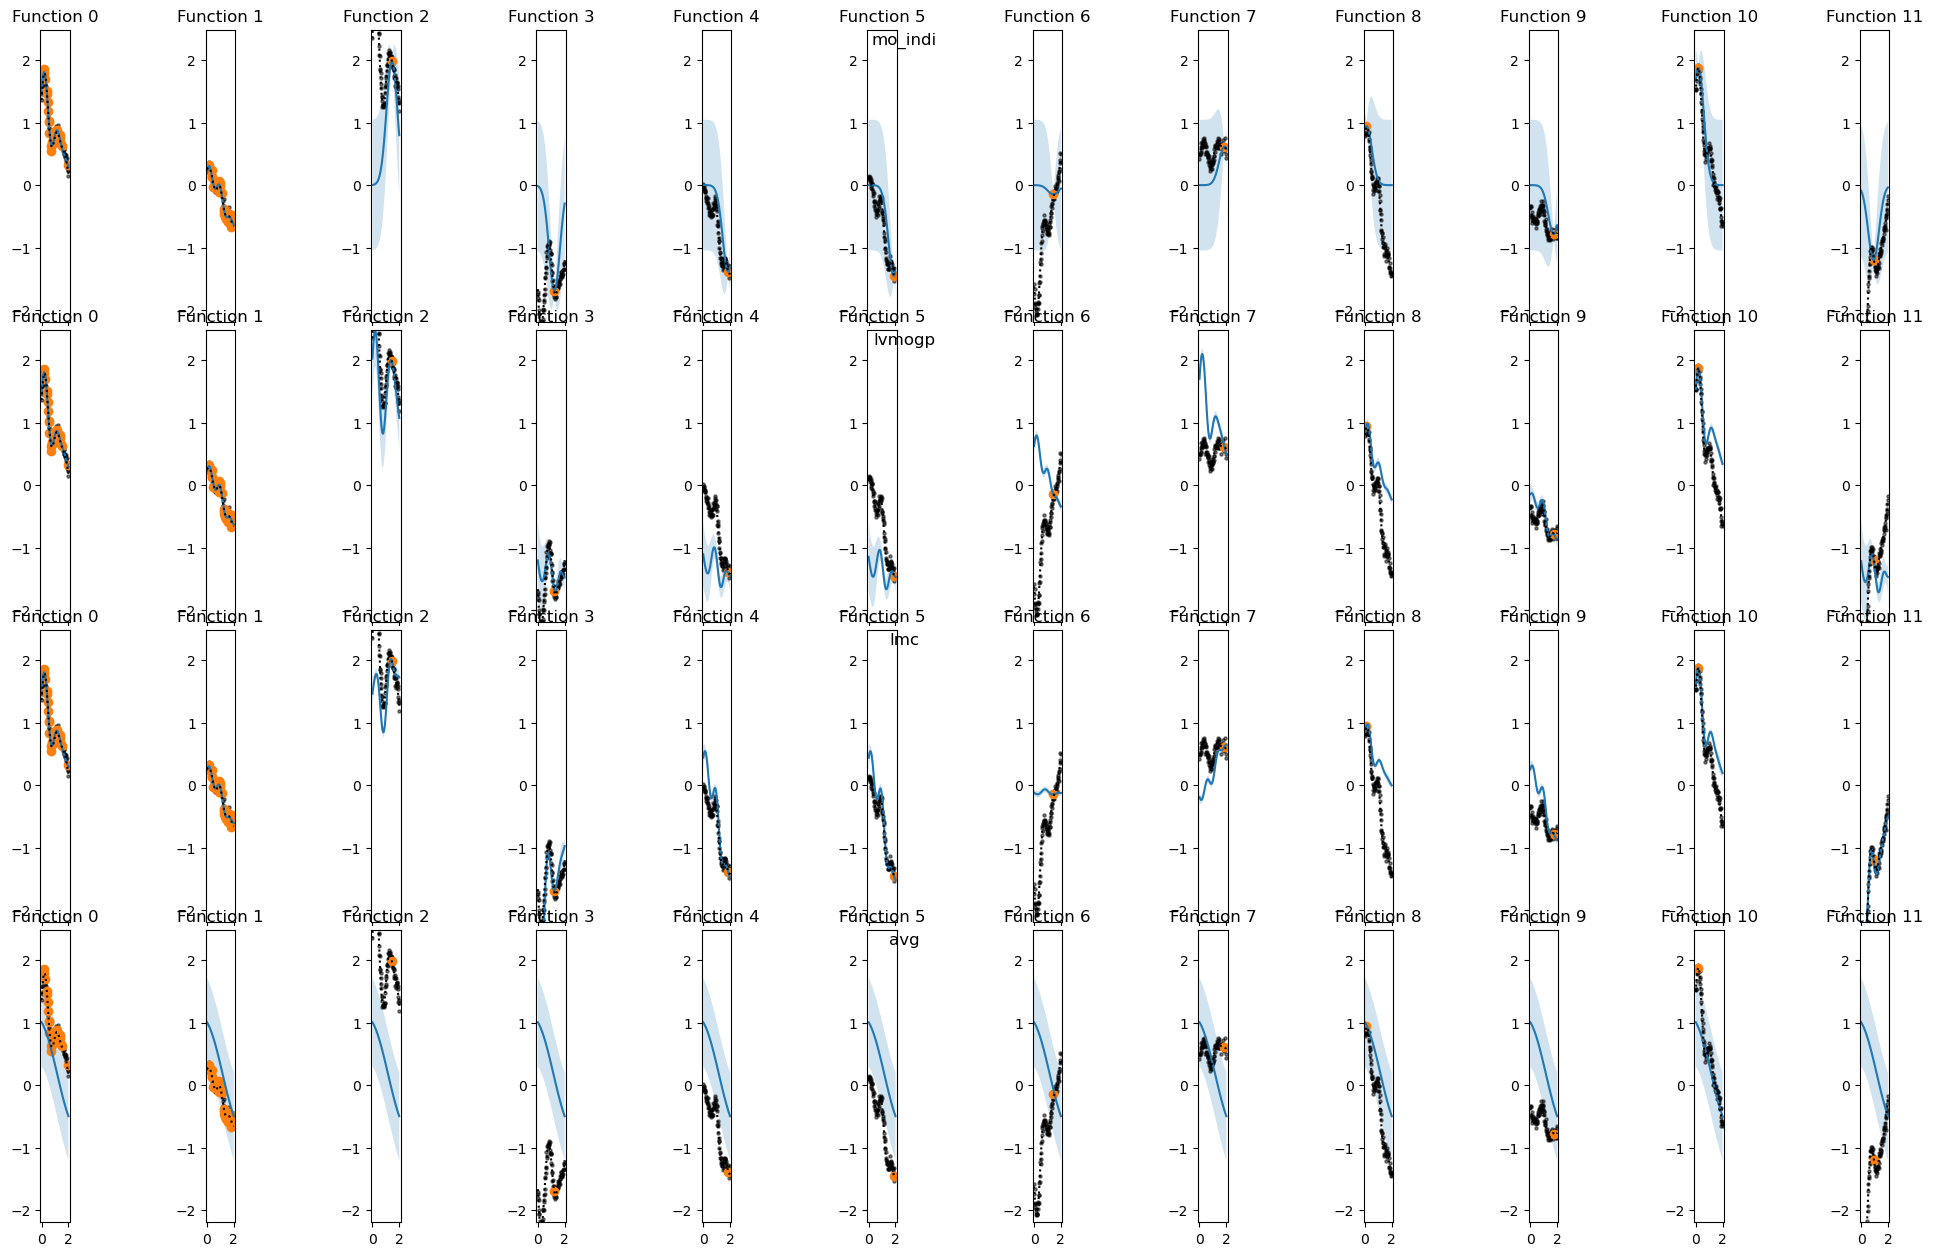

In [ ]:
plot_all_models_from_hyperparameters(gps, hyperparams, save_fig=False, save_path=None)